# Supplementary Information - Infill comparison 

For questions about this notebook, please contact Gaurav Ganti <gaurav.ganti@climateanalytics.org>.

In [11]:
import os
import pyam 
import matplotlib.pyplot as plt 
import numpy as np 
import string 

# Read in data

In [12]:
infill_data_set = ['bp','equinor', 'ieasr15']

In [13]:
for i, source in enumerate(infill_data_set):
    source_path = os.path.join(
        '..','output','{}_infilled_data.xlsx'.format(source)
    )
    if i == 0:
        inst_data = pyam.IamDataFrame(source_path)
    else:
        inst_data = inst_data.append(
            pyam.IamDataFrame(source_path)
        )

pyam.core - INFO: Reading file ../output/bp_infilled_data.xlsx
pyam.core - INFO: Importing meta indicators for 9 scenarios (for total of 9)
pyam.core - INFO: Reading file ../output/equinor_infilled_data.xlsx
pyam.core - INFO: Importing meta indicators for 3 scenarios (for total of 3)
pyam.core - INFO: Reading file ../output/ieasr15_infilled_data.xlsx
pyam.core - INFO: Importing meta indicators for 3 scenarios (for total of 3)


In [14]:
infilling_db = pyam.IamDataFrame(
    os.path.join('..','data','infilling_database.csv')
)

pyam.core - INFO: Reading file ../data/infilling_database.csv


In [15]:
models = [
    'eqw',
    'rms',
    'qrw'
]

In [16]:
variables = [
    'Emissions|CO2|Energy and Industrial Processes',
    'Emissions|CH4',
    'Emissions|N2O',
    'Emissions|BC'
]

In [17]:
scenario = [
    'NZ2021',
    'Rebalance'
]

In [18]:
import matplotlib
font = {'size'   : 16}

matplotlib.rc('font', **font)

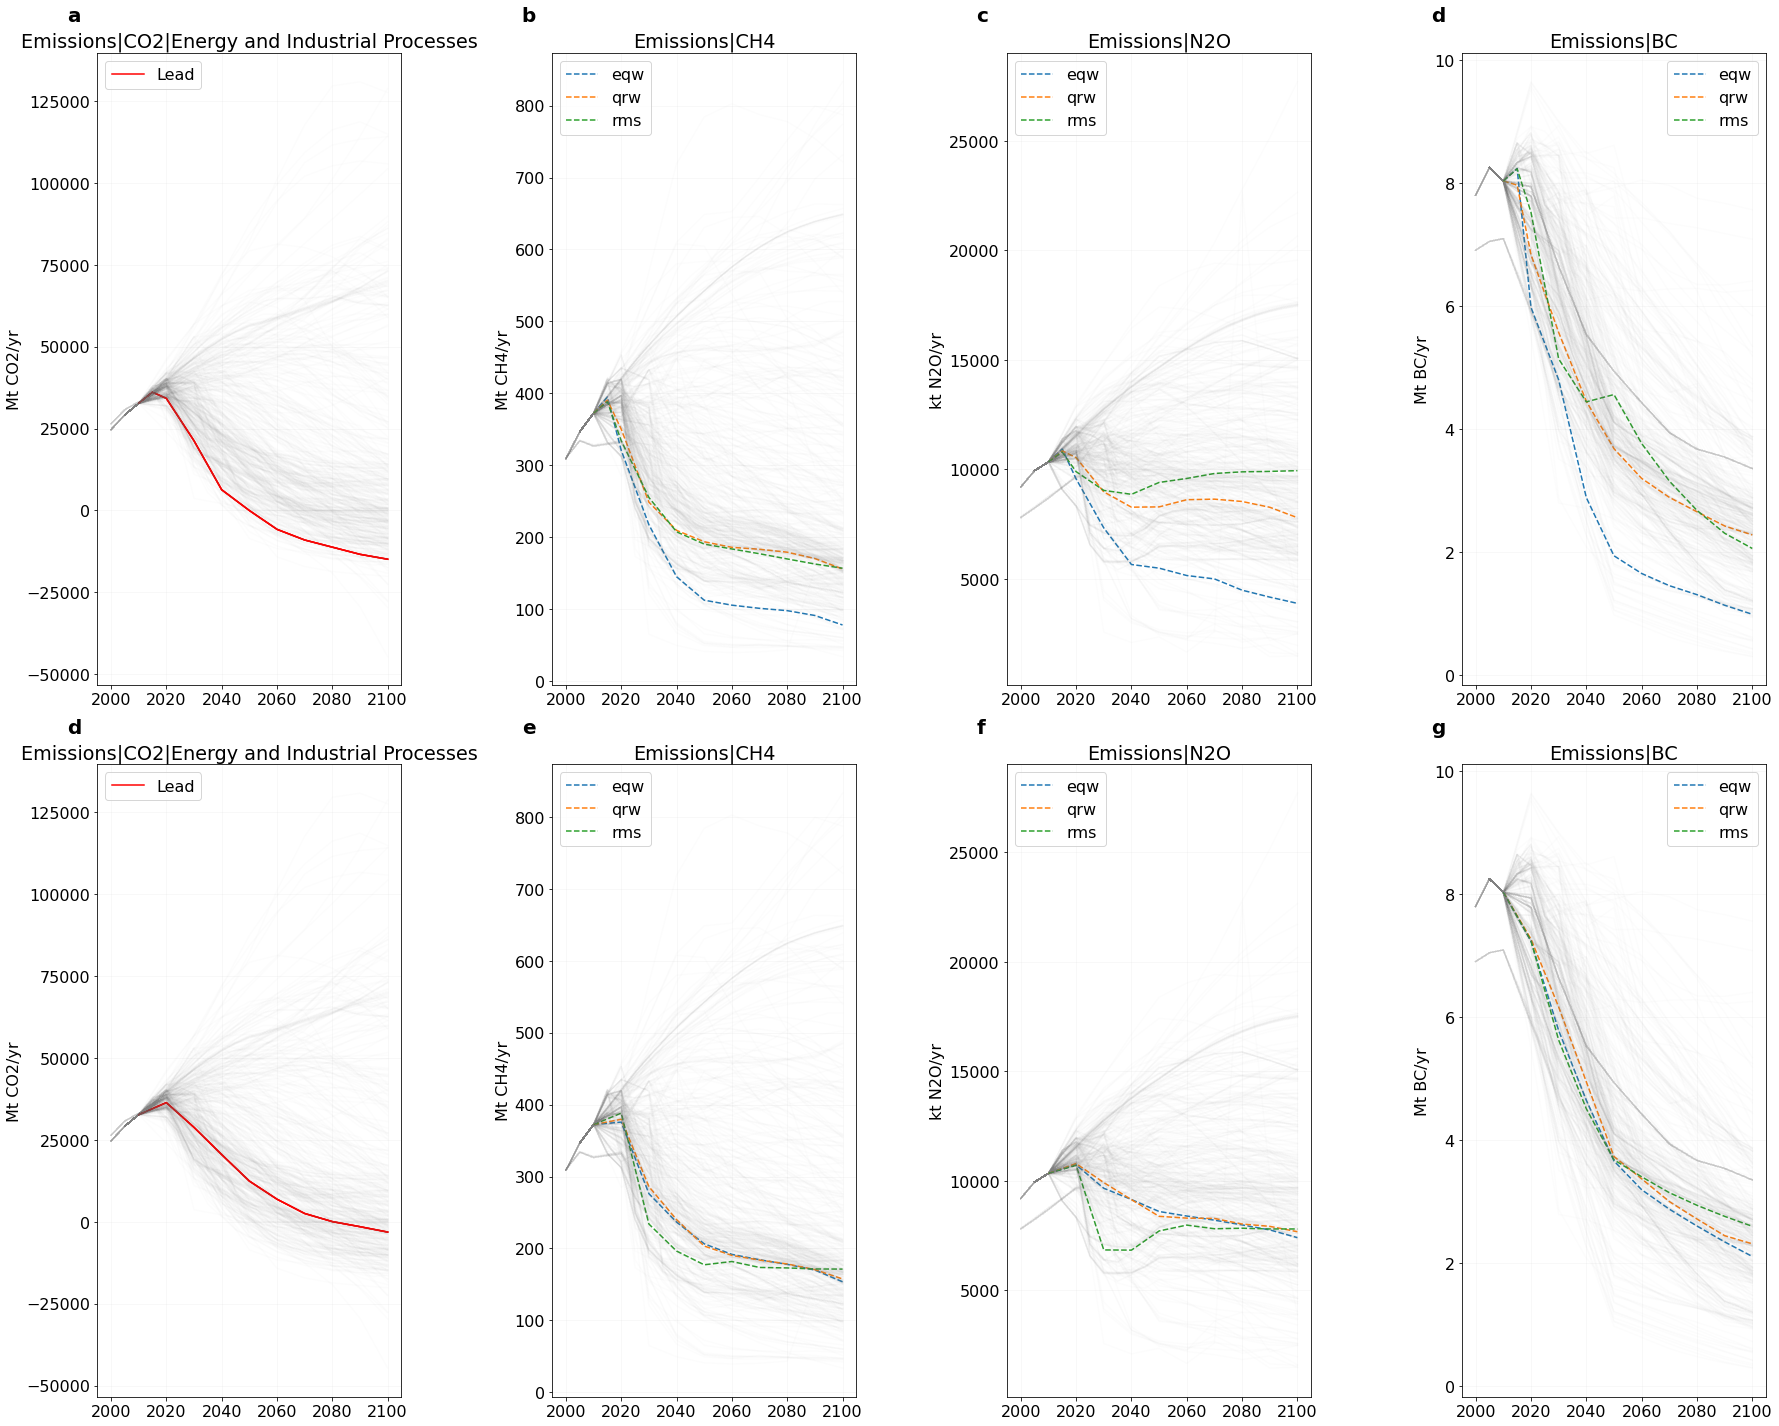

In [19]:
fig, ax = plt.subplots(2,4, figsize=(25,20))

for i, scen in enumerate(scenario):
    _scen_data = inst_data.filter(scenario = scen)
    for j, var in enumerate(variables):
        if j == 0:
            _scen_data.filter(variable = var).plot(ax=ax[i,j], color = 'red', label = 'Lead')
        else:
            _scen_data.filter(variable = var).plot(ax = ax[i,j], color = 'model', linestyle='dashed')

        infilling_db.filter(
            variable = var
        ).plot(ax=ax[i,j], color='grey', alpha=0.02, label='')

        ax[i,j].set_title(var)
        ax[i,j].set_xlabel('')
        ax[i,j].grid(alpha=0.1)

        if i == 0:
            ax[i,j].text(-0.1, 1.05, string.ascii_lowercase[j], transform= ax[i,j].transAxes,
            size = 20, weight="bold")
        else:
            ax[i,j].text(-0.1, 1.05, string.ascii_lowercase[j+3], transform= ax[i,j].transAxes,
            size = 20, weight="bold")

fig.tight_layout()

In [20]:
fig.savefig(
    os.path.join('figures', 'si_infilling_sensitivity.png'),
    dpi=450,
    bbox_inches='tight'
)